###  Example of regresssion.


 <div>
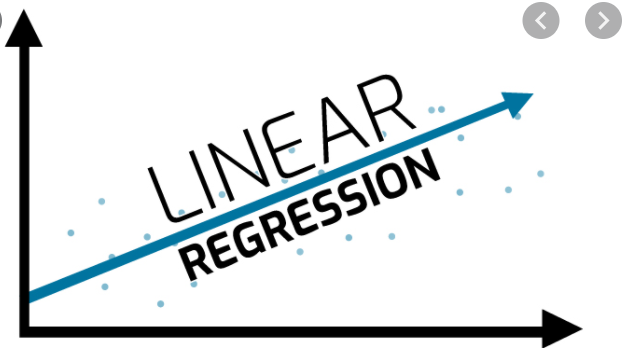
</div>

#### Question 1)

Prepare two datasets, independent and dependent variable with the size of your choice. Estimate the parameter and predict the values determined by the linear regression model. In this section, you must show all the relevant information including the estimators and predicted outcomes. Otherwise, some points will be deducted from the total mark. 



#####  <span style="color:red">Answer</span>


From the lecture, we have already learned how to find the best estimators of the simple regression line by the formula below;


<center>$\theta =(A^TA)^{-1}A^Ty$</center>



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cvx


In [13]:

# data points in colum vectors
X=np.random.randn(100,1).reshape(-1,1)
y=12+4*X+np.random.randn(100,1).reshape(-1,1)

In [14]:
m=y.shape[0]
#pad 1 to X
A=np.hstack([np.ones([m,1]),X])
A=np.asmatrix(A)

#esstimate the theta
theta=(A.T*A).I*A.T*y

print("estimators:\n",theta)

estimators:
 [[12.11261887]
 [ 4.07343252]]


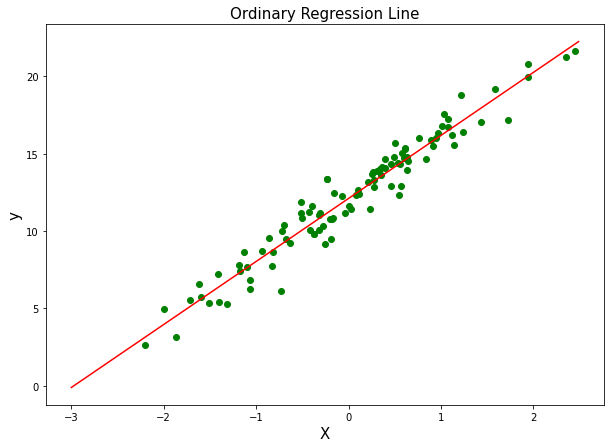

In [15]:
#draw a fitted line on the plot
plt.figure(figsize=(10,7))
plt.title("Ordinary Regression Line",fontsize=15)
plt.xlabel("X",fontsize=15)
plt.ylabel("y",fontsize=15)
plt.plot(X,y,'ko',c='g',label="data")

xp=np.arange(-3,2.5,0.01).reshape(-1,1)
yp=theta[0,0]+theta[1,0]*xp
plt.plot(xp,yp,'-',c='r')

Now, we need to compute the estimators using optimization programming.The reuslt should be very much identical to the one we obtained by the formula. 

In [16]:
theta2=cvx.Variable([2,1])
objective=cvx.Minimize(cvx.norm(A*theta2-y,2))
cvx.Problem(objective,[]).solve()

C:\Users\sd4be\anaconda3\lib\site-packages\cvxpy\expressions\expression.py:556: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 2 times so far.

  warnings.warn(msg, UserWarning)


9.478793135387265

In [17]:
print("theta:\n",theta2.value)

theta:
 [[12.11261887]
 [ 4.07343252]]


### Question 2)
Do you agree witih the following statement?

_"L2 norm is the superior measure in solving the optimizing problem under any situation.  The regression problem is not an exception."_


#####  <span style="color:red">Answer</span>

The statement is flawed in that depending on the nature of the given dataset we should take one from another. In other words, the choice of L1 over L2 or vice versa is highly case-dependent. For example, in the presence of outliers in our dataset, the L1 norm provides a more decent linear approximation than L2 does. Let's assume the presence of outliers is embedded in our dataset. We will experiment on linear models with two different norms and see which method produces a more reliable and fitting line in the end.  

In [61]:
X=np.vstack([X,np.array([-2,2]).reshape(-1,1)])
y=np.vstack([y,np.array([24,4]).reshape(-1,1)])

In [62]:
A=np.hstack([X**0,X])
A=np.asmatrix(A)

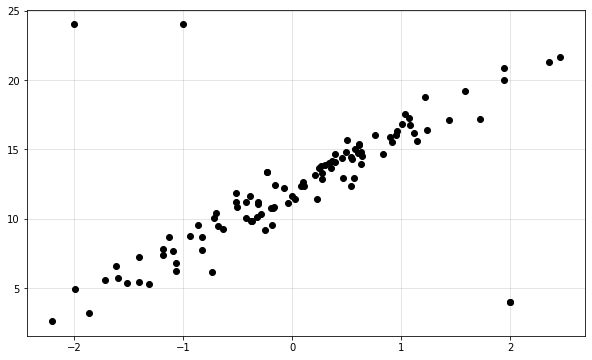

In [63]:
plt.figure(figsize=(10,6))
plt.plot(X,y,'ko',label='data')
plt.grid(alpha=0.4)
plt.show()

By adding either abnormally high or low value to our original data set, we can observe that two points are deviant from the rest. Now,we need to turn to the opimization problems,

In [64]:
theta1=cvx.Variable([2,1])
objective1=cvx.Minimize(cvx.norm(A*theta1-y,2))
prob1=cvx.Problem(objective1).solve()

C:\Users\sd4be\anaconda3\lib\site-packages\cvxpy\expressions\expression.py:556: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 6 times so far.

  warnings.warn(msg, UserWarning)


In [66]:
theta2=cvx.Variable([2,1])
objective2=cvx.Minimize(cvx.norm(A*theta2-y,1))
prob2=cvx.Problem(objective2).solve()

C:\Users\sd4be\anaconda3\lib\site-packages\cvxpy\expressions\expression.py:556: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 7 times so far.

  warnings.warn(msg, UserWarning)


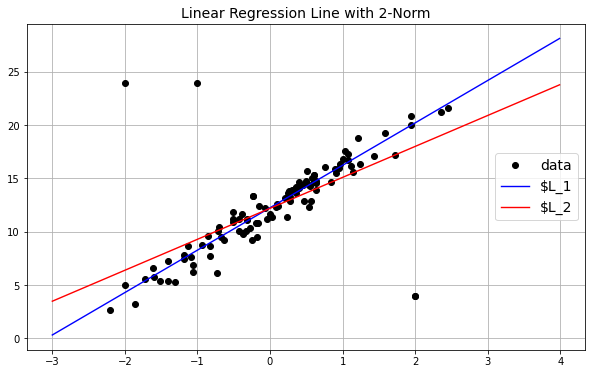

In [70]:
plt.figure(figsize=(10,6))
plt.plot(X,y,'ko',label='data')
xp=np.arange(-3,4,0.01).reshape(-1,1)
yp2=theta2.value[0,0]+theta2.value[1,0]*xp
plt.plot(xp,yp2,'r',linewidth=1.4,label="$L_1",color='b')
plt.plot(xp,yp1,'r',linewidth=1.4,label="$L_2") 
plt.legend(fontsize=14,loc=5)
plt.title("Linear Regression Line with 2-Norm",fontsize=14)
plt.grid()


The two lines gives a clear insight into how to tackle the outlier issues in their presence in our dataset. The regression line, which is colored red, tilts more toward the errors than the blue line. Our ultimate goal is to minimize the sum of squared errors between estimated and actual observation. To achieve the smallest errors possible,  the square term of the L-2 norm gives more 'weight'  the distance between outliers and actual observation so that the fitting line is heavily influenced by those points and tilted toward them. 

### Question 3) 

suppose that $y=x_1+x_2+.....+x_{n}$,where:

• $x_{1}, . . . , x_n$ are independent, and

• the $x_{i}$ each have a Gaussian distribution with mean 1 and variance 1



(a) We wish to express y as a linear function of just $x_1, . . . , x_{n}$. 
    What is the linear function that minimizes MSE?

(b) If your estimated model failed to achieve the satisfactory level of estimation you would previously expect, what should be the plausible reasons behind this case? Do you have any suggestions to improve the capability of estimation?


<span style="color:red">Answer (a)</span>

Question 2 is closely related to multivariate regression. The complete regression model should be constructed as follows;

<center>$\hat y= \theta_{1}x_{i}+  \theta_{2}x_{2}+   \theta_{3}x_{3}+....+  \theta_{n}x_{n}$</center>

Before defining the mean squred error of the function, we need to reconstruct a new datset with 1 left-padded.Then, the best estimator will be expressed in the form of the matrix. 

<center>$ \phi(x^{(i)})=\begin{pmatrix}               
& \\1
\\x_1^{(i)}
\\x_2^{(i)}      
\\x_3^{(i)}
\\.
\\.
\\x_n^{(i)}
& 
\end{pmatrix}$</center>



The unbaised estimator will be 

<center>$\theta^{*}=(\phi^T\phi)^{-1}\phi^Ty$</center>

In our python code,we limit the number of features to 2,which enables us to visually represent the data.

In [172]:
n=300
x1=np.random.normal(1,1,n).reshape((-1,1))
x2=np.random.normal(1,1,n).reshape((-1,1))
noise=0.5*np.random.normal(1,1,n).reshape((-1,1))
y=1.5+1*x1+2*x2+noise

In [197]:
phi=np.hstack([np.ones((n,1)),x1,x2])
phi=np.asmatrix(phi)
theta=(phi.T*phi).I*phi.T*y

In [265]:
xm1,xm2=np.meshgrid(np.arange(np.min(x1),np.max(x1),0.5),np.arange(np.min(x2),np.max(x2),0.5))
y_h=theta[0,0]+theta[1,0]*xm1+theta[2,0]*xm2

In [259]:
from mpl_toolkits.mplot3d import Axes3D

Text(0.5, 0.92, 'Multivariate Regression')

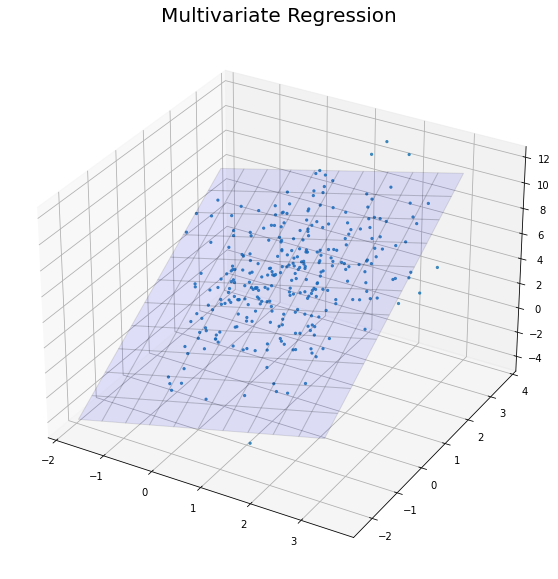

In [281]:
plt.figure(figsize=(10,10))
ax=plt.subplot(1,1,1,projection='3d')
ax.scatter(x1,x2,y,alpha=0.8,s=5)
ax.plot_surface(xm1,xm2,y_h,alpha=0.1,rstride=1,cstride=1,edgecolor='black',color='b')
plt.title("Multivariate Regression",fontsize=20)

$$The\ regression\ equation\ is \ \hat y= 2.09+0.94*x_{1}+1.96*x_{2} $$

#### <span style="color:red">Answer (b)</span>

One of the possible reasons is that the model can not capture the non-linear relationship between dependent and independent variables. To enhance the power of estimation, we should consider two possible ways, adding more polynomial variables and running radial basis function on our data. But each method has its advantage and disadvantage. 



Let's start with the polynomial regression. Even though adding more polynomial terms to the original model will increase the ability to estimate the value,  we risk our model suffering from overfitting. That is, the accuracy of estimation would be much higher on the training dataset, but we can not get the same level on the newly entered data. Finding the optimal power of variables would be crucial in terms of bias-variance trade-off. 


The radial function will also contribute to increasing the estimation power, but the function itself is parametric and we need to estimate mean and variance, which adds more complexity to our modeling. 